In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

In [2]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

## 데이터 전처리

### - 결측값, 이상값 처리

In [3]:
df_heart = pd.read_csv("../../dataset/heart_2020_cleaned.csv")
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# 이상치 확인 (# BMI: BMI 수치, # PhysicalHealth, MentalHealth: 날짜, SleepTime : 수면시간)
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<Axes: ylabel='BMI'>

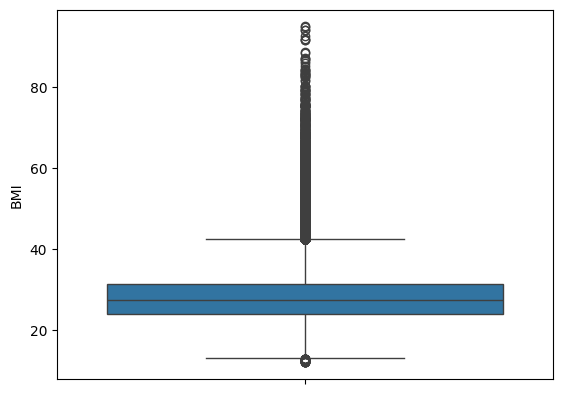

In [6]:
sns.boxplot(data = df_heart["BMI"])

In [7]:
# 이상치 확인 (# BMI: BMI 수치, # PhysicalHealth, MentalHealth: 날짜, SleepTime : 수면시간)
df_heart.describe()
# BMI 사분위수 범위 적용
Q1 = 24.030000
Q3 = 31.420000
IQR = Q3-Q1
print(Q1-1.5*IQR, Q3+1.5*IQR)

12.945 42.505


In [8]:
condition_bmi = "12.945 <= BMI <= 42.505"

df_heart_stable = df_heart.query(condition_bmi)
df_heart_stable

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


## 상관관계 분석

### 0. 데이터타입

In [9]:
# 데이터 프레임 타입 확인
df_heart_stable.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [27]:
df_categorical = df_heart_stable[["HeartDisease","Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","AgeCategory","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]]
df_continuous = df_heart_stable[["HeartDisease","BMI","PhysicalHealth","MentalHealth","SleepTime"]]

### 1. 범주형과의 상관관계
- 귀무가설 : 심장병은 범주형 범주에 영향을 미치지 않을 것이다.
- 대립가설 : 심장병은 범주형 범주에 영향을 미칠 것이다.

#### (1) p-value 검정 : chi2_contingency 선정
- 범주형 간 독립성 증명 : 카이제곱

In [48]:
for x in range(1,len(list(df_categorical.columns))):
    crosstab = pd.crosstab(df_categorical['HeartDisease'], df_categorical[list(df_categorical.columns)[x]])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"- {list(df_categorical.columns)[x]}")
    print(f"카이제곱 통계량: {chi2}")
    if p < 0.05:
        print("p-value = {}, p < 0.05 이므로 심장병과 관계성을 가집니다".format(p))
    else : 
        print("p-value = {}, p > 0.05 이므로 심장병과 관계성을 가지지 않습니다.".format(p))
    print("---------------")

- Smoking
카이제곱 통계량: 3636.1036735815296
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- AlcoholDrinking
카이제곱 통계량: 330.66879877407956
p-value = 6.872623181433505e-74, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- Stroke
카이제곱 통계량: 11981.802940363
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- DiffWalking
카이제곱 통계량: 12387.19010106483
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- Sex
카이제곱 통계량: 1538.8616212804861
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- AgeCategory
카이제곱 통계량: 18956.906615309963
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- Race
카이제곱 통계량: 824.787076892126
p-value = 5.0196352327939694e-176, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- Diabetic
카이제곱 통계량: 10400.434252985742
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- PhysicalActivity
카이제곱 통계량: 2988.0930549442883
p-value = 0.0, p < 0.05 이므로 심장병과 관계성을 가집니다
---------------
- GenHealth
카이제곱 통계량: 20890.771978196302
p-value = 0.0, p < 0.05 이므로

### 2. 연속형과의 상관관계
- 귀무가설 : 심장병은 연속형 범주에 영향을 미치지 않을 것이다.
- 대립가설 : 심장병은 연속형 범주에 영향을 미칠 것이다.

#### (1) 정규성 검정 : Andserson Test 선정
- (5000개 미만 : shaprio test, 5000개 이상 : anderson test)

In [66]:
for x in range(1,len(list(df_continuous.columns))):
    result = stats.anderson(df_continuous[df_continuous.columns[x]])
    print(f"- {list(df_continuous.columns)[x]}")
    print("statistic : {}".format(result.statistic))
    print("critical_values : {}".format(result.critical_values))
    print("significance_level : {}".format(result.significance_level))
    if result.statistic > max(result.critical_values):
        print("statistic > critical_values 이므로 비정규분포입니다.")
    else : 
        print("statistic < critical_values 이므로 정정규분포입니다.")
    # if p < 0.05:
    #     print("p-value = {}, p < 0.05 이므로 심장병과 관계성을 가집니다".format(p))
    # else : 
    #     print("p-value = {}, p > 0.05 이므로 심장병과 관계성을 가지지 않습니다.".format(p))
    print("---------------")

- BMI
statistic : 1637.1123729861574
critical_values : [0.576 0.656 0.787 0.918 1.092]
significance_level : [15.  10.   5.   2.5  1. ]
statistic > critical_values 이므로 비정규분포입니다.
---------------
- PhysicalHealth
statistic : 71751.38056236936
critical_values : [0.576 0.656 0.787 0.918 1.092]
significance_level : [15.  10.   5.   2.5  1. ]
statistic > critical_values 이므로 비정규분포입니다.
---------------
- MentalHealth
statistic : 58793.7329894494
critical_values : [0.576 0.656 0.787 0.918 1.092]
significance_level : [15.  10.   5.   2.5  1. ]
statistic > critical_values 이므로 비정규분포입니다.
---------------
- SleepTime
statistic : 10016.550413670833
critical_values : [0.576 0.656 0.787 0.918 1.092]
significance_level : [15.  10.   5.   2.5  1. ]
statistic > critical_values 이므로 비정규분포입니다.
---------------


#### (2) p-value 검정 : Wilcoxon Test 선정
- (범주형 두 집단 : wilcoxon test, 범주형 세집단 이상 : krustal test)

In [88]:
heart_list =  df_continuous["HeartDisease"].value_counts().index.to_list()
heart_list

['No', 'Yes']

In [101]:
for x in range(1,len(list(df_continuous.columns))):
    series_list = []
    for heart in heart_list :
      condition = f"HeartDisease == '{heart}'"
      series_value = df_continuous.query(condition)[df_continuous.columns[x]]
      series_list.append(series_value)
    stat, p = stats.ranksums(series_list[0],series_list[1])
    print(f"- {list(df_continuous.columns)[x]}")
    print("statistics : {}".format(stat))
    print("p : {}".format(p))
    if p < 0.05 :
        print("p < 0.05 이므로 심장병과의 연관도가 높습니다.".format(p))
    else : 
        print("p > 0.05 이므로 심장병과의 연관도가 낮습니다.".format(p))
    print("---------------")

- BMI
statistics : -30.916782265406642
p : 7.106591482383787e-210
p < 0.05 이므로 심장병과의 연관도가 높습니다.
---------------
- PhysicalHealth
statistics : -62.49786866529667
p : 0.0
p < 0.05 이므로 심장병과의 연관도가 높습니다.
---------------
- MentalHealth
statistics : 2.6234740787323765
p : 0.00870380678550433
p < 0.05 이므로 심장병과의 연관도가 높습니다.
---------------
- SleepTime
statistics : -4.418137779188047
p : 9.95549530188656e-06
p < 0.05 이므로 심장병과의 연관도가 높습니다.
---------------


## 인사이트
### 1. 심장병과 범주형 컬럼과의 관계
- 모든 범주형 컬럼이 심장병의 유무와 연관성을 가지고 있다.
### 2. 심장병과 연속형 컬럼과의 관계
- 모든 연속형 컬럼이 심장병의 유무와 연관성을 가지고 있다.
#### 결과 :  모든 데이터 값이 심장병을 결정하는데 큰 연관성을 가지는 것을 확인.
#### 방향성 : 신체 정보 데이터를 이용한 심장병 유무 파악을 할 수 있는 예측모델 생성.